In [20]:
from dataset import load_dataset, load_labels, convert_to_epochs

In [21]:
import scipy
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
n_channels = 32
sfreq = 128
ch_types = 'eeg'

In [23]:
coordinates_filename = 'Data/Coordinates.locs'

In [24]:
ch_names = []
with open(coordinates_filename, "r") as file:
    for line in file:
        elements = line.split()
        channel = elements[-1]
        ch_names.append(channel)

In [25]:
data = load_dataset(raw=True)
labels = load_labels()

# Filtering one sample

In [26]:
sample = data[1]
info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types=ch_types)
raw = mne.io.RawArray(sample, info, first_samp=0, copy='auto', verbose=False)

In [27]:
raw_bandpass = raw.copy().filter(1, 50, verbose=False)

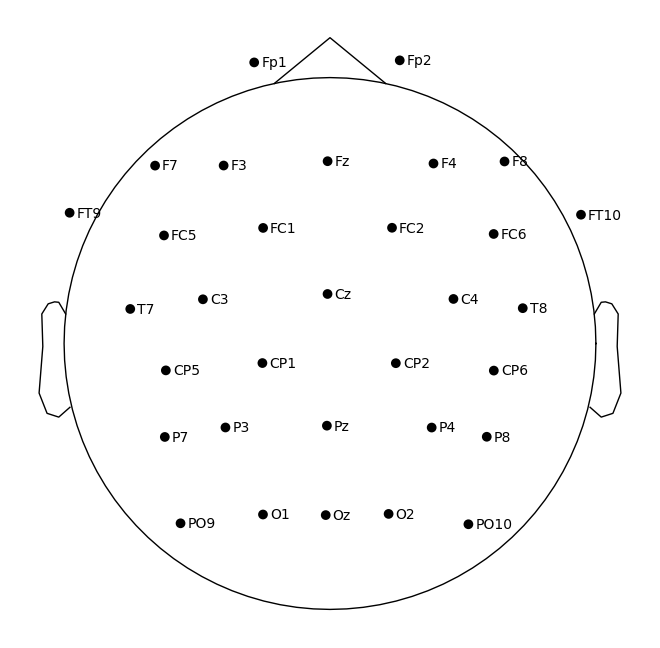

In [31]:
montage = mne.channels.make_standard_montage('standard_1020')
raw_bandpass.set_montage(montage)
fig = raw_bandpass.plot_sensors(kind='topomap', ch_type='eeg', show_names=True)
plt.close(fig)

In [32]:
ica = mne.preprocessing.ICA(n_components=18)
ica.fit(raw_bandpass)
ica.plot_sources(raw_bandpass)

Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 18 components
Fitting ICA took 4.6s.
Creating RawArray with float64 data, n_channels=18, n_times=3200
    Range : 0 ... 3199 =      0.000 ...    24.992 secs
Ready.
Using pyopengl with version 3.1.6


/opt/homebrew/Caskroom/miniforge/base/envs/init/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


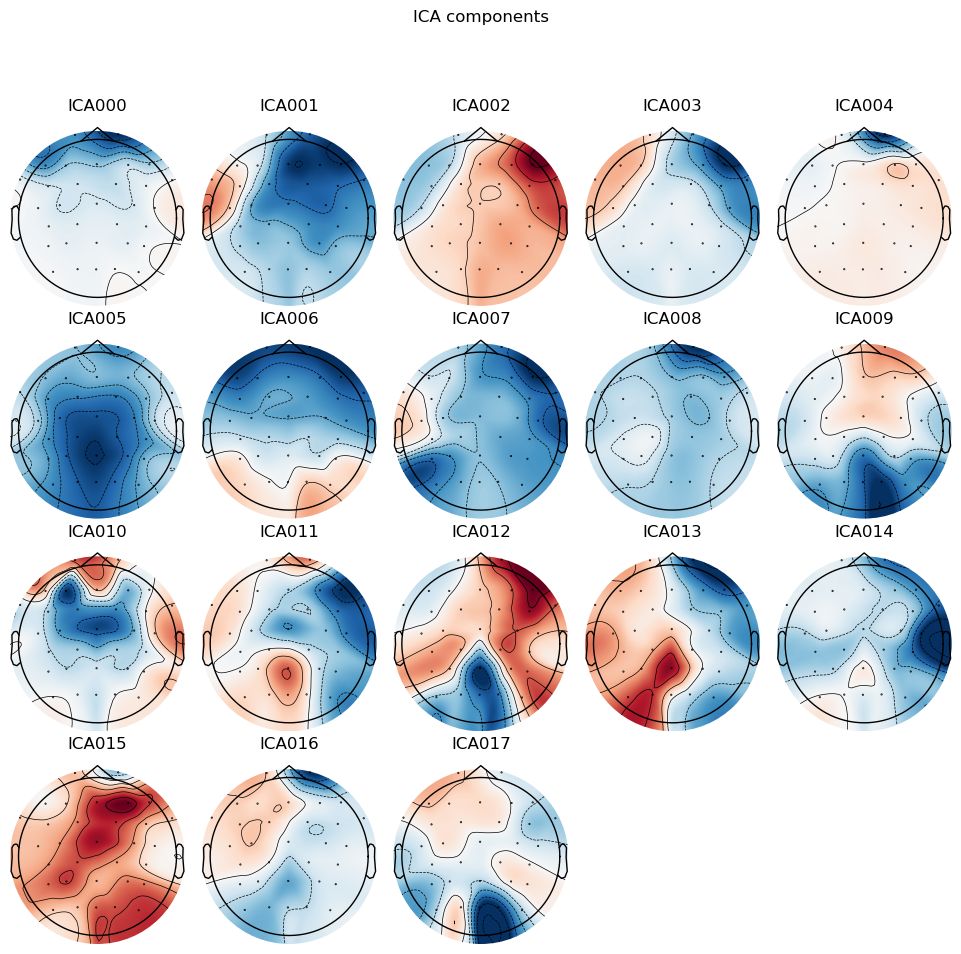

[<MNEFigure size 975x967 with 18 Axes>]

In [33]:
ica.plot_components()

In [ ]:
# raw.plot(scalings='auto', n_channels=n_channels, verbose=False)

In [34]:
raw_savgol = raw.copy().savgol_filter(h_freq=7, verbose=False)
# raw_savgol.plot(scalings='auto', n_channels=n_channels, verbose=False)

In [35]:
raw_np = raw._data
raw_savgol_np = raw_savgol._data
trend_removed_np = raw_np-raw_savgol_np
trend_removed = mne.io.RawArray(trend_removed_np, info, first_samp=0, copy='auto', verbose=False)
trend_removed.plot(scalings='auto', n_channels=n_channels, verbose=False)

Channels marked as bad:
none


In [ ]:
# raw_bandpass = raw.copy().filter(2, 50, verbose=False)
# raw_bandpass.plot(scalings='auto', n_channels=32)

In [ ]:
# raw_bandpass_savgol = raw_bandpass.copy().savgol_filter(h_freq=7, verbose=False)
# raw_bandpass_savgol.plot(scalings='auto', n_channels=32)

In [ ]:
filtered_data = np.empty(data.shape)

# Filtering the full dataset

In [ ]:
for i, sample in enumerate(data):
    info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types=ch_types)
    raw = mne.io.RawArray(sample, info, first_samp=0, copy='auto', verbose=False)
    raw_bandpass = raw.copy().filter(2, 50, verbose=False)
    raw_bandpass_savgol = raw_bandpass.copy().savgol_filter(h_freq=7, verbose=False)
    filtered_data[i] = raw_bandpass_savgol._data